In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
import os.path as osp
import numpy as np
import torch
import json
from torch_audioset.engine import SoundLabelingEvaluator
from torch_audioset.params import CommonParams
from torch_audioset.utils import mapify_iterable
from torch_audioset.audioset_ontology.ontology import AudioSetOntology, TreeNode


def main():
    ont = AudioSetOntology()
    tree = ont.tree
    tree.display_children_info()
    node = TreeNode.trace(tree, ['Human sounds', 'Human voice'])
    chosen = TreeNode.get_non_abstract_from_below(node)

    return
    candidates = ['oQ-f7N9TUXY', 'TqcTvkFlL7M']
    root = '/home/haochenw/projects/multisensory.pytorch/tools/output'

    mod = AudioCategoryLabels(root)
    sec = mod.mass_process(mod.video_ids)
    print(sec[:10])


class AudioCategoryLabels():
    def __init__(self, root):
        json_fname = osp.join(root, SoundLabelingEvaluator.PRED_FNAME)
        with open(json_fname, 'r') as f:
            meta = json.load(f)
        self.root = root
        self.model = meta['model']
        self.cats = meta['model_categories']
        self.preds = mapify_iterable(meta['predictions'], 'id')
        self.video_ids = list(self.preds.keys())

    def load_pred_tsr(self, vid, logit_to_prob=False):
        tsr = np.load(osp.join(
                self.root, SoundLabelingEvaluator.TSR_DUMP_DIR,
                self.preds[vid]['category_tsr_fname']
        ))
        if logit_to_prob:
            tsr = torch.sigmoid(torch.from_numpy(tsr)).numpy()
        return tsr

    def mass_process(self, video_ids):
        combined = []
        for vid in video_ids:
            tsr = self.load_pred_tsr(vid, logit_to_prob=True)
            combined.append(tsr)
        combined = np.concatenate(combined, axis=0)
        return combined
        # cat_inx = 0
        # sec = combined[:, cat_inx]
        # sec = np.sort(sec, axis=0)
        # return sec

In [3]:
root = '/home/haochenw/projects/multisensory.pytorch/tools/output'
mod = AudioCategoryLabels(root)
combined = mod.mass_process(mod.video_ids)

In [11]:
print(combined.shape)

(3367719, 527)


In [6]:
names = [ c['name'] for c in mod.cats ]

In [36]:
def display_cat(name):
    if name in names:
        inx = names.index(name)
        seg = combined[:, inx]
        order = np.argsort(-1 * seg)
        seg = seg[order]
        length_in_mins = (seg > 0.5).sum() / 3600 * 60
        print(length_in_mins)
        plt.plot(seg)
        plt.show()
    else:
        print("{} not in list".format(name))

In [30]:
ont = AudioSetOntology()
rootNode = ont.tree
rootNode.display_children_info()

['Human sounds', 'Animal', 'Music', 'Natural sounds', 'Sounds of things', 'Source-ambiguous sounds', 'Channel, environment and background']


current cat Vehicle
7045.466666666667


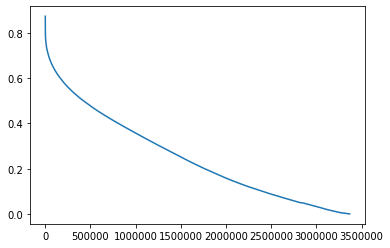

current cat Boat, Water vehicle
0.0


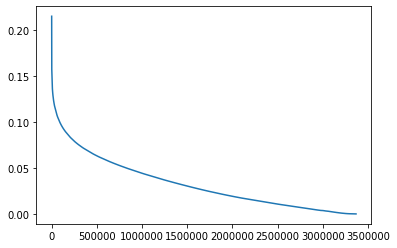

current cat Sailboat, sailing ship
0.0


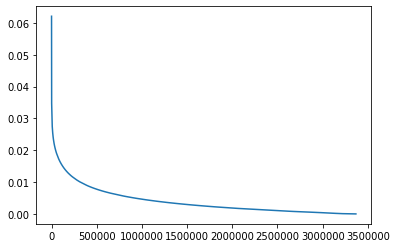

current cat Rowboat, canoe, kayak
0.0


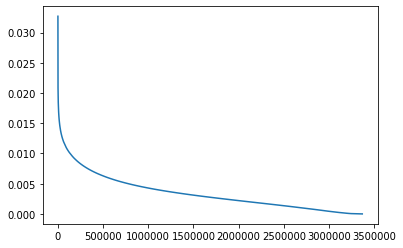

current cat Motorboat, speedboat
0.0


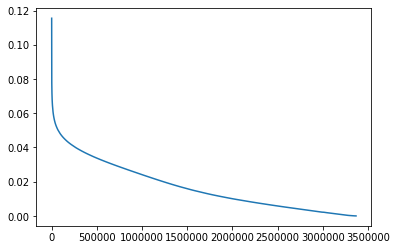

current cat Ship
0.0


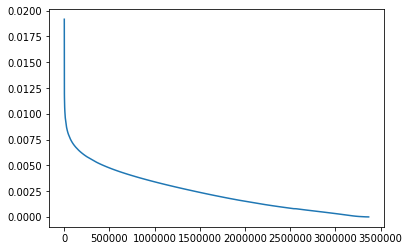

current cat Motor vehicle (road)
0.0


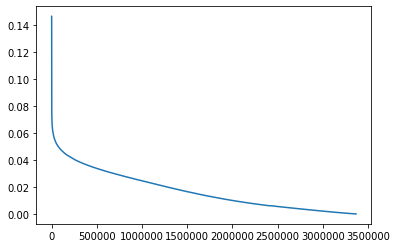

current cat Car
65.9


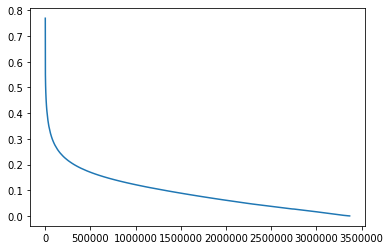

current cat Vehicle horn, car horn, honking
0.0


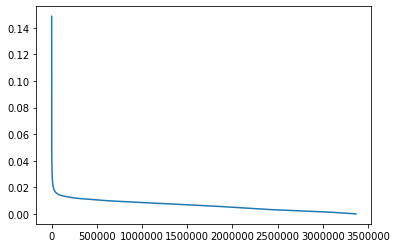

current cat Toot
0.0


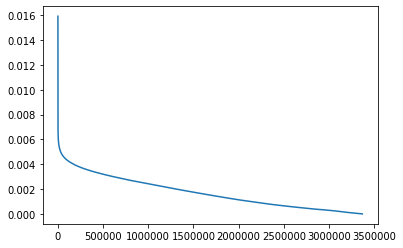

current cat Car alarm
0.0


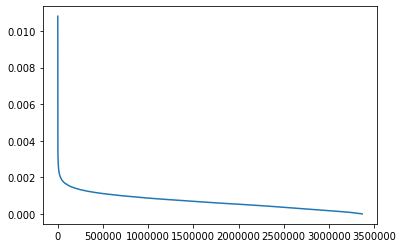

current cat Power windows, electric windows
0.0


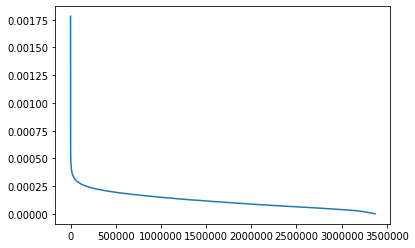

current cat Skidding
0.0


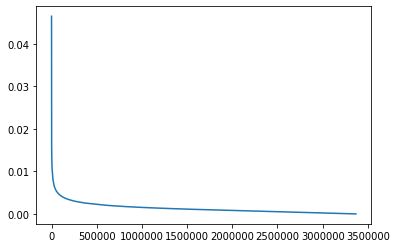

current cat Tire squeal
0.0


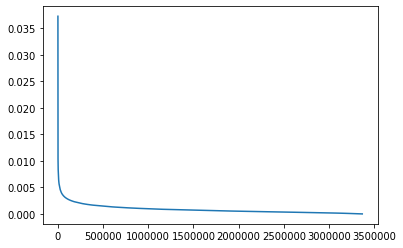

current cat Car passing by
0.0


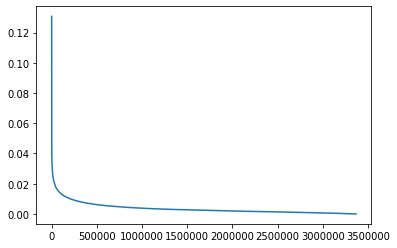

current cat Race car, auto racing
0.0


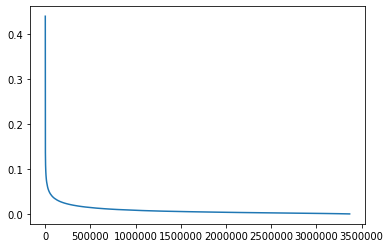

current cat Truck
0.0


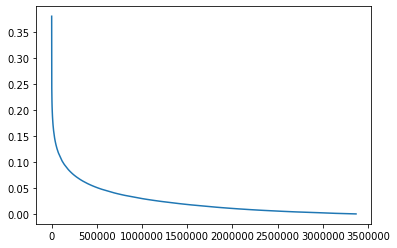

current cat Air brake
0.0


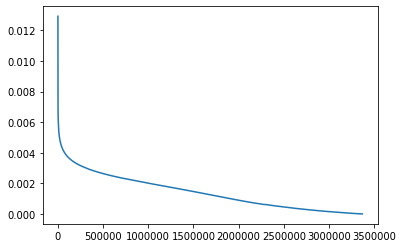

current cat Air horn, truck horn
0.0


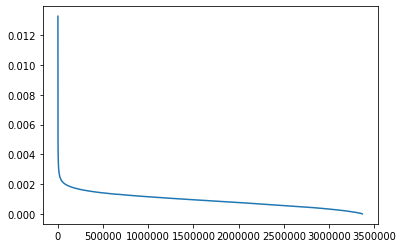

current cat Reversing beeps
0.0


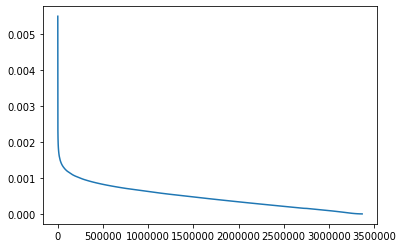

current cat Ice cream truck, ice cream van
0.0


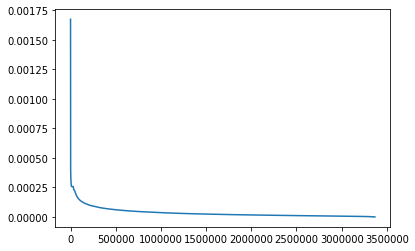

current cat Bus
0.0


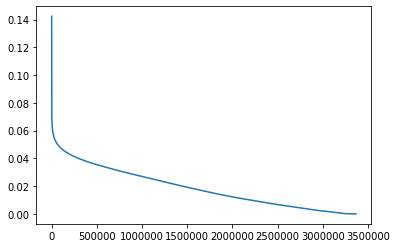

current cat Emergency vehicle
24.9


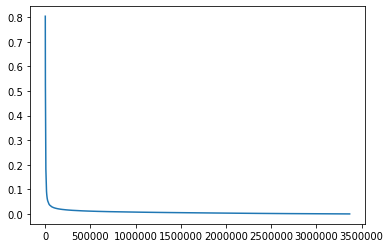

current cat Police car (siren)
0.08333333333333334


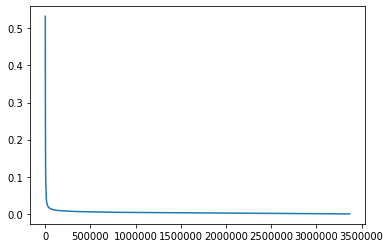

current cat Ambulance (siren)
0.1


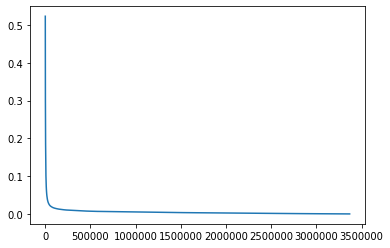

current cat Fire engine, fire truck (siren)
5.516666666666667


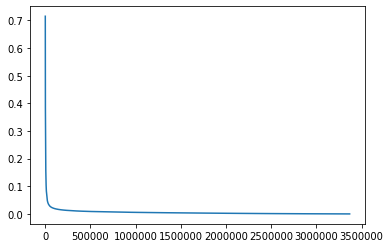

current cat Motorcycle
0.0


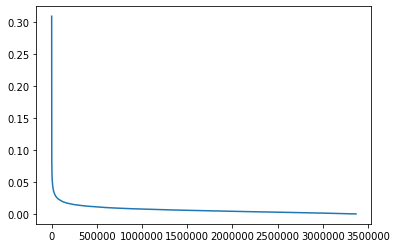

current cat Traffic noise, roadway noise
0.0


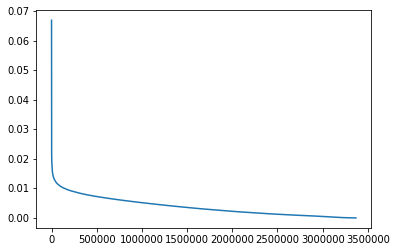

current cat Rail transport
0.3


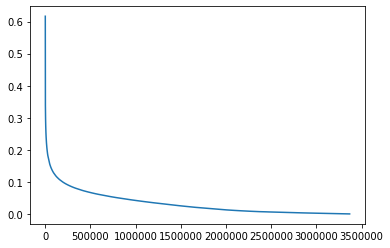

current cat Train
7.6000000000000005


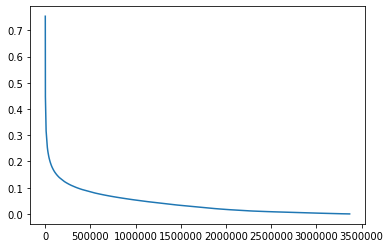

current cat Train whistle
0.0


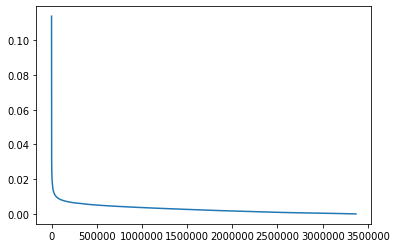

current cat Train horn
0.0


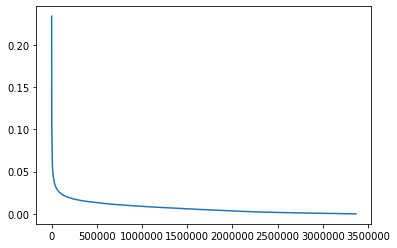

current cat Railroad car, train wagon
0.15


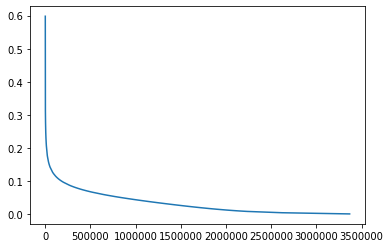

current cat Train wheels squealing
0.0


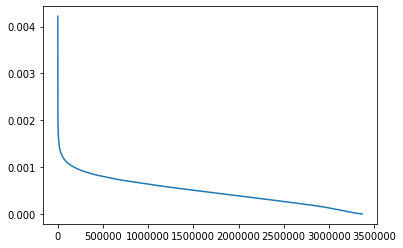

current cat Subway, metro, underground
0.0


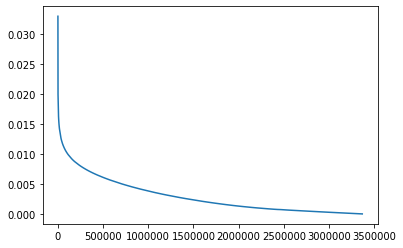

current cat Aircraft
0.0


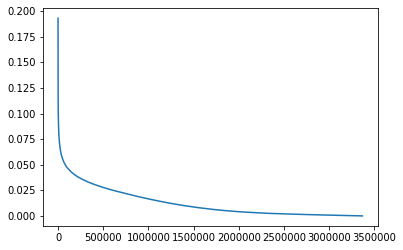

current cat Aircraft engine
0.0


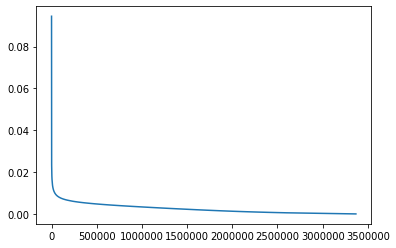

current cat Jet engine
0.0


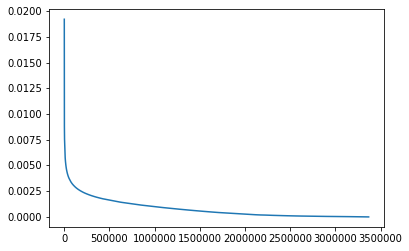

current cat Propeller, airscrew
0.0


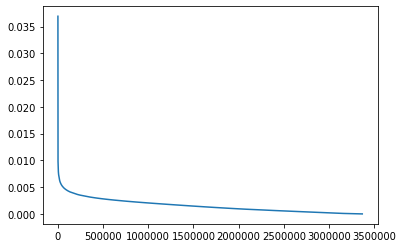

current cat Helicopter
0.0


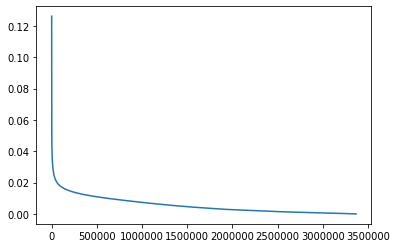

current cat Fixed-wing aircraft, airplane
0.0


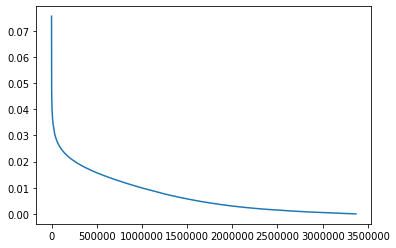

current cat Non-motorized land vehicle


ValueError: 'Non-motorized land vehicle' is not in list

In [35]:
vehicle = TreeNode.trace(rootNode, ['Sounds of things', 'Vehicle'])
candidates = TreeNode.get_non_abstract_from_below(vehicle)
for c in candidates:
    name = c.name
    print('current cat {}'.format(name))
    display_cat(name)

current cat Alarm
0.0


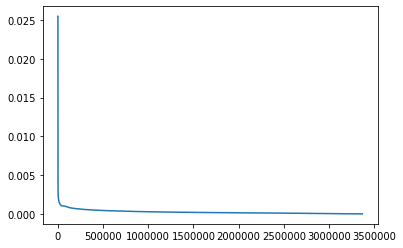

current cat Telephone
0.0


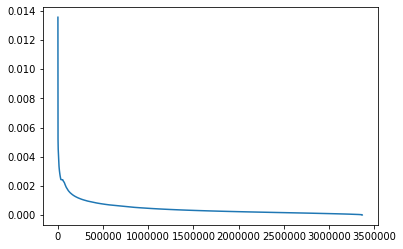

current cat Telephone bell ringing
0.0


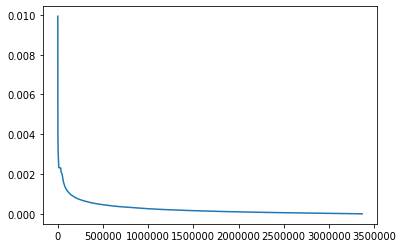

current cat Ringtone
0.0


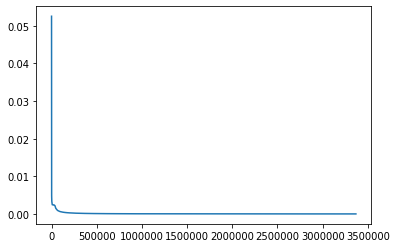

current cat Cellphone buzz, vibrating alert
Cellphone buzz, vibrating alert not in list
current cat Telephone dialing, DTMF
0.0


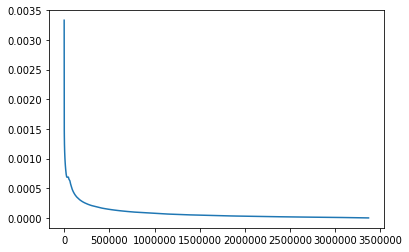

current cat Dial tone
0.0


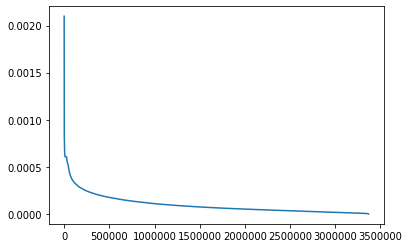

current cat Busy signal
0.0


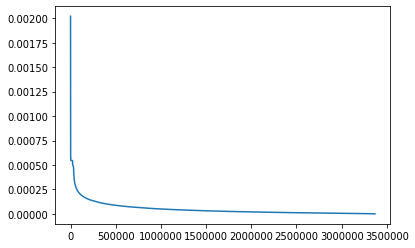

current cat Alarm clock
0.0


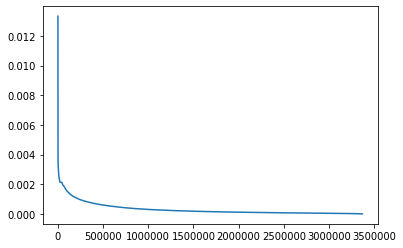

current cat Siren
10.883333333333333


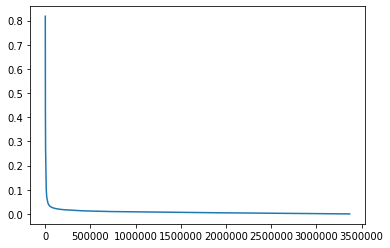

current cat Police car (siren)
0.08333333333333334


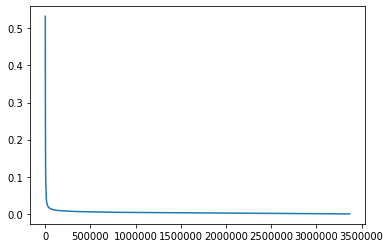

current cat Ambulance (siren)
0.1


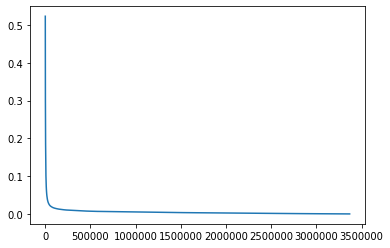

current cat Fire engine, fire truck (siren)
5.516666666666667


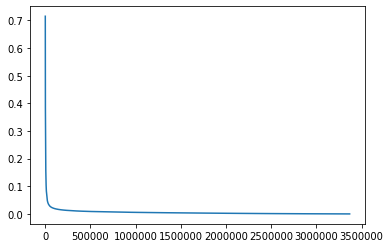

current cat Civil defense siren
0.08333333333333334


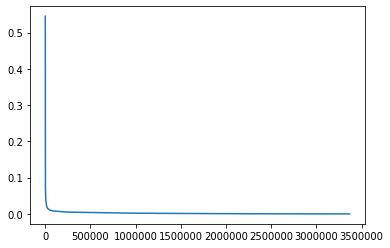

current cat Doorbell
0.0


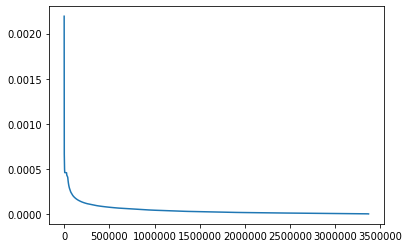

current cat Ding-dong
0.0


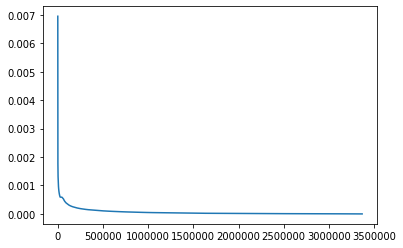

current cat Buzzer
0.0


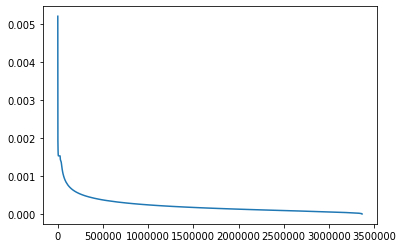

current cat Smoke detector, smoke alarm
0.0


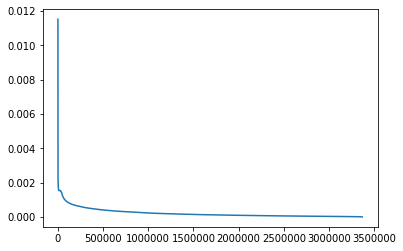

current cat Fire alarm
0.0


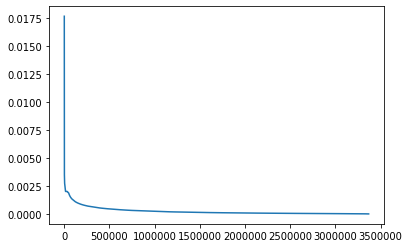

current cat Car alarm
0.0


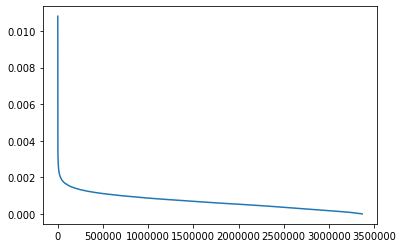

current cat Vehicle horn, car horn, honking
0.0


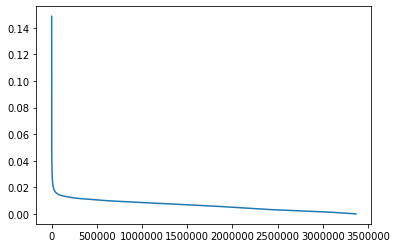

current cat Toot
0.0


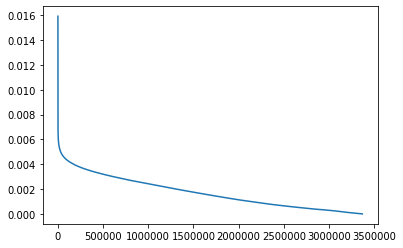

current cat Bicycle bell
0.0


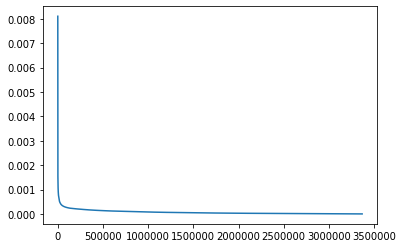

current cat Air horn, truck horn
0.0


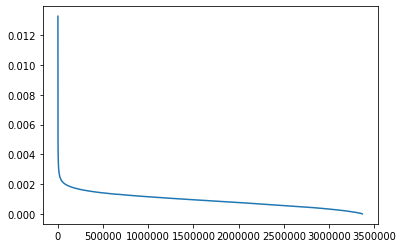

current cat Foghorn
0.0


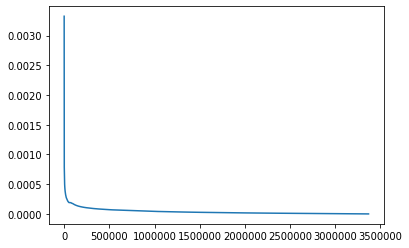

current cat Whistle
0.0


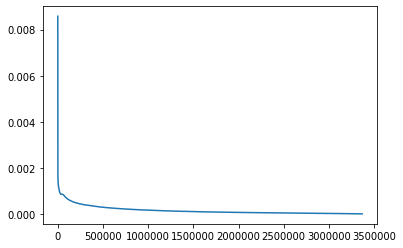

current cat Kettle whistle
Kettle whistle not in list
current cat Steam whistle
0.0


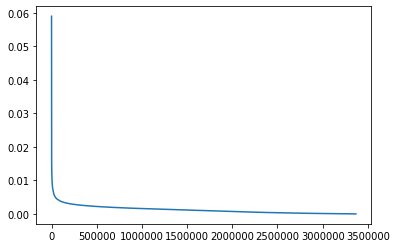

In [38]:
vehicle = TreeNode.trace(rootNode, ['Sounds of things', 'Alarm'])
candidates = TreeNode.get_non_abstract_from_below(vehicle)
for c in candidates:
    name = c.name
    print('current cat {}'.format(name))
    display_cat(name)